In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
# Load the dataset
df = pd.read_csv("C://Users//DELL//Downloads//Stock Market.csv")

# Print the column names
print(df.columns)

# Convert 'Date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'RSIadjclose15', 'RSIvolume15',
       ...
       'high-15', 'K-15', 'D-15', 'stochastic-k-15', 'stochastic-d-15',
       'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'TARGET'],
      dtype='object', length=1285)


In [18]:
# 1. Exploratory Data Analysis (EDA)
# Display the first few rows of the dataset
print(df.head())

# Summary statistics of the dataset
print(df.describe())

        date       open       high        low      close   adjclose  volume  \
0 2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1 2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2 2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3 2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4 2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo  \
0              NaN              NaN               NaN 

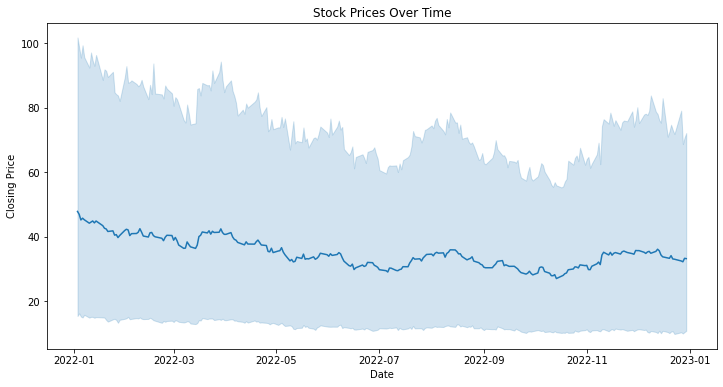

In [21]:
# Visualize key statistics and trends in stock prices
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='close', data=df)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [23]:
# 2. Predictive Modeling
# Feature engineering: Convert Date to numerical features if needed
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

# Select relevant features for modeling
features = ['Year', 'Month', 'Day', 'open', 'high', 'low']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['close'], test_size=0.2, random_state=42)

# Implement Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Evaluate the model
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))
print(f'Linear Regression RMSE: {linear_rmse}')

Linear Regression RMSE: 1.0176929185417272


In [24]:
# 3. Documentation
# Document your approach, methodologies, and insights gained from the stock market dataset.
# Provide clear explanations for the chosen predictive model.

# Save the model if needed
# import joblib
# joblib.dump(linear_model, 'linear_model.pkl')